In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [80]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There exist some columns which contain null values. We can deal with these values in different ways.
One way is removing the columns or rows which contain null values. Because of the massive number of null values in `Cabin` column and small number of null values in `Embarked` column, I will use this method for those two columns.\
Second way is imputing missing values with mean/median of column. I will use this method for `Age`.\
Another way is to predict missing values, using non-null values.

In [82]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [83]:
train_df['Age'] = train_df['Age'].replace(np.NaN, train_df['Age'].mean())
test_df['Age'] = test_df['Age'].replace(np.NaN, test_df['Age'].mean())

In [84]:
train_df.dropna(axis=0, inplace=True)
test_df.dropna(axis=0, inplace=True)

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [86]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

There is also some non-numeric columns in the dataset. I will remove `Name` and `Ticket` columns and convert `Sex` and `Embarked` columns to numerical values.
Also I will remove `PassengerId` column, because it's useless.

In [88]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [89]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

In [90]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2})

Now we should normalize dataset and train model with it.

In [110]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [94]:
scaler = MinMaxScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

In [97]:
X_train, y_train = train_df.drop('Survived', axis=1), train_df['Survived']
X_test, y_test = test_df.drop('Survived', axis=1), test_df['Survived']

In [98]:
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_linearSVC = metrics.accuracy_score(y_test, pred)
print(acc_linearSVC)

0.9616306954436451


In [104]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_SVC = metrics.accuracy_score(y_test, pred)
print(acc_SVC)

0.9832134292565947


In [105]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, pred)
print(acc_knn)

0.8441247002398081


In [106]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [129]:
model = Sequential()

model.add(Input(X_train.shape))
model.add(Dense(4))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(2, activation='sigmoid'))

opt = SGD(learning_rate=1e-2)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
            X_train, to_categorical(y_train), 
            batch_size=32, 
            validation_data=(X_test, to_categorical(y_test)), 
            epochs=100
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/28 [>.............................] - ETA: 12s - loss: 0.9064 - accuracy: 0.3750WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f67d02bb510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

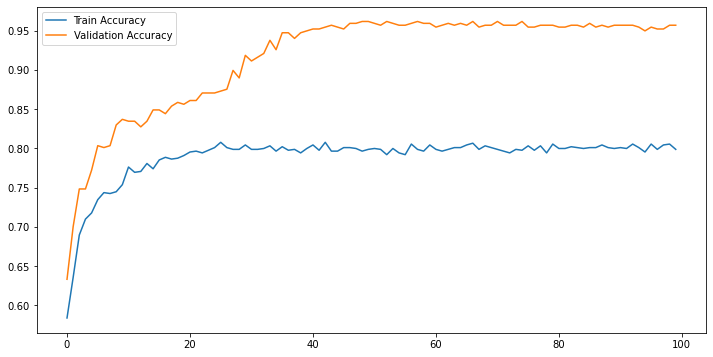

In [130]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

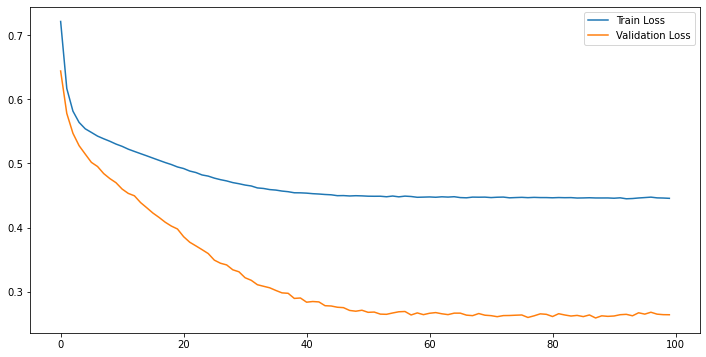

In [131]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()